In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set the directory path where you want to load the CSV file
cd_df = pd.read_csv('cardio//covid_data.csv')
# cardio_alco_df = pd.read_csv('/kaggle/input/covidtest/cardio_alco.csv', sep=';')
ca_df = pd.read_csv('cardio//cardio_alco.csv')
cb_df = pd.read_csv('cardio//cardio_base.csv')

# Cardio Base DF

In [2]:
display(cb_df.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


## Long process... 

In [3]:
import pandas as pd
from datetime import datetime, timedelta

def convert_age_to_date(age_in_days):
    # Define the reference date (e.g., today's date)
    reference_date = datetime.now()
    
    # Subtract the age in days from the reference date to get the birth date
    birth_date = reference_date - timedelta(days=age_in_days)
    
    # Format the birth date as 'DD/MM/YYYY'
    formatted_birth_date = birth_date.strftime('%d/%m/%Y')
    
    return formatted_birth_date

# Apply the function to convert age to date
cb_df['birth_date'] = cb_df['age'].apply(convert_age_to_date)

# Print the resulting birth dates
print(cb_df[['age', 'birth_date']])

         age  birth_date
0      18393  02/11/1973
1      20228  24/10/1968
2      18857  26/07/1972
3      17623  12/12/1975
4      17474  09/05/1976
...      ...         ...
69995  19240  09/07/1971
69996  22601  26/04/1962
69997  19066  30/12/1971
69998  22431  13/10/1962
69999  20540  17/12/1967

[70000 rows x 2 columns]


In [4]:
def calculate_age(birth_date):
    # Parse the birth date string to a datetime object
    birth_date = datetime.strptime(birth_date, "%d/%m/%Y")
    
    # Get the current date
    current_date = datetime.now()
    
    # Calculate the difference in years
    age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    
    return age

# Apply the calculate_age function to each value in the 'age' column
cb_df['new_age'] = cb_df['birth_date'].apply(calculate_age)

cb_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,birth_date,new_age
0,0,18393,2,168,62.0,110,80,1,0,02/11/1973,50
1,1,20228,1,156,85.0,140,90,3,0,24/10/1968,55
2,2,18857,1,165,64.0,130,70,3,0,26/07/1972,51
3,3,17623,2,169,82.0,150,100,1,0,12/12/1975,48
4,4,17474,1,156,56.0,100,60,1,0,09/05/1976,47
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,09/07/1971,52
69996,99995,22601,1,158,126.0,140,90,2,0,26/04/1962,61
69997,99996,19066,2,183,105.0,180,90,3,0,30/12/1971,52
69998,99998,22431,1,163,72.0,135,80,1,0,13/10/1962,61


In [5]:
cb_df['365_age'] = (cb_df['age'] / 365).astype(int)
cb_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,birth_date,new_age,365_age
0,0,18393,2,168,62.0,110,80,1,0,02/11/1973,50,50
1,1,20228,1,156,85.0,140,90,3,0,24/10/1968,55,55
2,2,18857,1,165,64.0,130,70,3,0,26/07/1972,51,51
3,3,17623,2,169,82.0,150,100,1,0,12/12/1975,48,48
4,4,17474,1,156,56.0,100,60,1,0,09/05/1976,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,09/07/1971,52,52
69996,99995,22601,1,158,126.0,140,90,2,0,26/04/1962,61,61
69997,99996,19066,2,183,105.0,180,90,3,0,30/12/1971,52,52
69998,99998,22431,1,163,72.0,135,80,1,0,13/10/1962,61,61


 How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [6]:
avg_weight_by_age = cb_df.groupby('new_age').agg({'weight': 'mean'})
percentage_difference = (avg_weight_by_age.max() / avg_weight_by_age.min() - 1) * 100
print(percentage_difference)

weight    28.554157
dtype: float64


Do people over 50 have higher cholesterol levels than the rest?

In [7]:
cb_df['cholesterol'].isnull().sum()

0

In [8]:
cb_df[cb_df['new_age'] <= 50]['cholesterol'].mean()

1.2481322072437875

In [9]:
# Check data types
display(cb_df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
birth_date      object
new_age          int64
365_age          int32
dtype: object

In [10]:
avg_cholesterol_by_age = cb_df.groupby('new_age').agg({'cholesterol': 'mean'})
avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean() / avg_cholesterol_by_age[
    avg_cholesterol_by_age.index <= 50].mean() - 1

cholesterol    0.193327
dtype: float64

In [11]:
cb_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,birth_date,new_age,365_age
0,0,18393,2,168,62.0,110,80,1,0,02/11/1973,50,50
1,1,20228,1,156,85.0,140,90,3,0,24/10/1968,55,55
2,2,18857,1,165,64.0,130,70,3,0,26/07/1972,51,51
3,3,17623,2,169,82.0,150,100,1,0,12/12/1975,48,48
4,4,17474,1,156,56.0,100,60,1,0,09/05/1976,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,09/07/1971,52,52
69996,99995,22601,1,158,126.0,140,90,2,0,26/04/1962,61,61
69997,99996,19066,2,183,105.0,180,90,3,0,30/12/1971,52,52
69998,99998,22431,1,163,72.0,135,80,1,0,13/10/1962,61,61


Are men more likely to be a smoker than women?

In [12]:
# Calculate the total number of male and female smokers
male_smokers = cb_df.loc[(cb_df['gender'] == 2) & (cb_df['smoke'] == 1)].shape[0]
female_smokers = cb_df.loc[(cb_df['gender'] == 1) & (cb_df['smoke'] == 1)].shape[0]

# Calculate the total number of males and females
total_males = cb_df[cb_df['gender'] == 2].shape[0]
total_females = cb_df[cb_df['gender'] == 1].shape[0]

# Compute the proportion of smokers for each gender
male_smokers_proportion = male_smokers / total_males
female_smokers_proportion = female_smokers / total_females

# Compare the proportions
if male_smokers_proportion > female_smokers_proportion:
    print("Yes, men are more likely to be smokers than women.", male_smokers_proportion, 'as against', female_smokers_proportion)
elif male_smokers_proportion < female_smokers_proportion:
    print("No, women are more likely to be smokers than men.", female_smokers_proportion, 'as against', male_smokers_proportion)
else:
    print("There is no significant difference in smoking habits between men and women.")

Yes, men are more likely to be smokers than women. 0.21888026154474868 as against 0.017856358444981332


In [13]:
# Group the data by 'gender' and calculate the mean height
average_height_by_gender = cb_df.groupby('gender')['height'].mean()

# Find the taller gender based on average height
taller_gender = average_height_by_gender.idxmax()
taller_height = average_height_by_gender.max()

print(f"The taller gender is {taller_gender} with an average height of {taller_height} cm.")

The taller gender is 2 with an average height of 169.94789538210054 cm.


How tall are the tallest 1% of people

In [14]:
cb_df['height'].quantile(0.99)

184.0

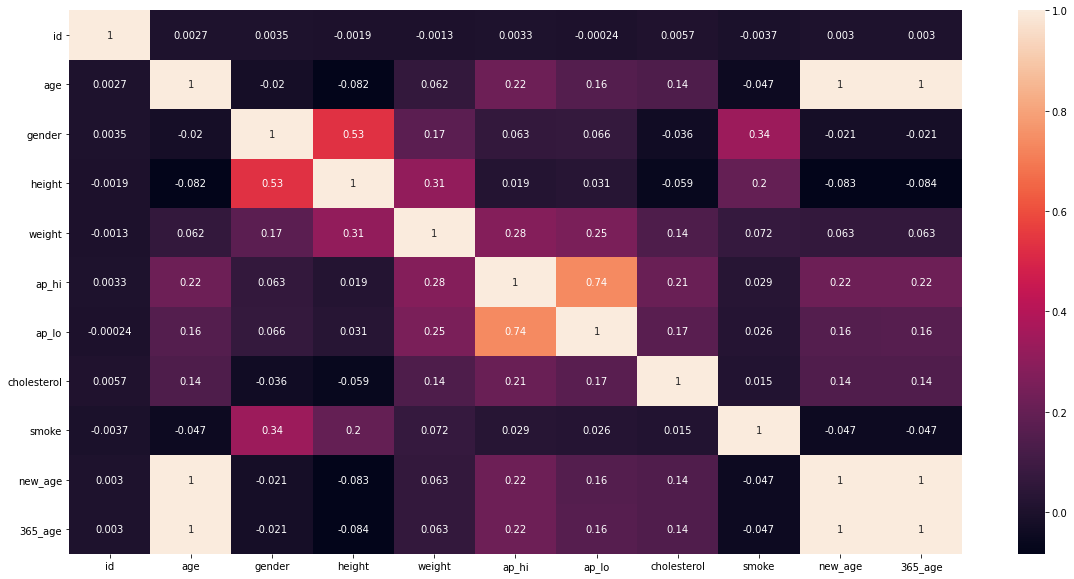

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
corr = cb_df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

The two highest correlates according to the spearman method is 'ap_high' and 'ap_low'

What percentage of people are more than 2 standard deviations far from the average height?


In [16]:
height_avg = cb_df.height.mean()
height_std = cb_df.height.std()
len(cb_df[abs(cb_df.height - height_avg) > 2 * height_std]) / len(cb_df.height) * 100

3.3357142857142854

# Cardio Alco DF

In [17]:
display(ca_df)

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


In [18]:
cca_df = pd.read_csv('cardio//cardio_alco.csv', sep=';')

In [19]:
cm_df = pd.merge(cca_df, cb_df, on='id', how='inner')

What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol sonsumption information!

In [20]:
cm_df.dtypes

id               int64
alco             int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
birth_date      object
new_age          int64
365_age          int32
dtype: object

In [21]:
cm_df

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,birth_date,new_age,365_age
0,44,0,14605,1,159,60.0,110,70,1,0,17/03/1984,39,40
1,45,0,20652,1,160,73.0,130,85,1,0,27/08/1967,56,56
2,46,0,21940,2,173,82.0,140,90,3,0,16/02/1964,60,60
3,47,0,20404,1,163,55.0,120,80,1,0,01/05/1968,55,55
4,49,0,18328,2,175,95.0,120,80,1,0,06/01/1974,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,0,21151,1,178,69.0,130,90,1,0,15/04/1966,57,57
56899,99950,0,19538,2,155,76.0,130,90,1,0,14/09/1970,53,53
56900,99951,0,22491,2,170,72.0,120,80,1,0,14/08/1962,61,61
56901,99952,0,15450,2,165,66.0,120,80,1,0,23/11/1981,42,42


In [22]:
cardio_over_50_df = cm_df[cm_df['new_age'] > 50]
cardio_over_50_df['alco'] == 1
# print(cardio_over_50_df['alco'].unique())

# cardio_over_50_df
# len(cardio_over_50_df[cardio_over_50_df['alco'] == 1]) / len(cardio_over_50_df)

1        False
2        False
3        False
6        False
8        False
         ...  
56896    False
56898    False
56899    False
56900    False
56902    False
Name: alco, Length: 36873, dtype: bool

In [23]:
# Calculate the number of individuals consuming alcohol over the age of 50
consume_alcohol_over_50 = len(cm_df[(cm_df['new_age'] > 50) & (cm_df['alco'] == 1)])

# Calculate the total population over the age of 50
total_population_over_50 = cm_df[cm_df['new_age'] > 50].shape[0]

# Calculate the proportion of individuals consuming alcohol over the age of 50
proportion_alcohol_over_50 = consume_alcohol_over_50 / total_population_over_50

print("Proportion of individuals consuming alcohol over the age of 50:", proportion_alcohol_over_50 * 100)

Proportion of individuals consuming alcohol over the age of 50: 4.908740813061048


Which of the following statements is true with 95% confidence?

- Smokers have higher blood pressure than non-smokers

- Smokers have higher cholesterol levels than non-smokers

- Smokers weigh less than non-smokers

- Men have higher blood pressure than women

In [24]:
cm_df.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,birth_date,new_age,365_age
0,44,0,14605,1,159,60.0,110,70,1,0,17/03/1984,39,40
1,45,0,20652,1,160,73.0,130,85,1,0,27/08/1967,56,56
2,46,0,21940,2,173,82.0,140,90,3,0,16/02/1964,60,60
3,47,0,20404,1,163,55.0,120,80,1,0,01/05/1968,55,55
4,49,0,18328,2,175,95.0,120,80,1,0,06/01/1974,50,50


In [25]:
from scipy import stats

# Separate smokers and non-smokers
smokers = cm_df[cm_df['smoke'] == 1]
non_smokers = cm_df[cm_df['smoke'] == 0]

# Calculate descriptive statistics
# For blood pressure
bp_smokers = smokers[['ap_hi', 'ap_lo']]
bp_non_smokers = non_smokers[['ap_hi', 'ap_lo']]

# For cholesterol levels
cholesterol_smokers = smokers['cholesterol']
cholesterol_non_smokers = non_smokers['cholesterol']

# For weight
weight_smokers = smokers['weight']
weight_non_smokers = non_smokers['weight']

# For blood pressure based on gender
bp_men = cm_df[cm_df['gender'] == 1][['ap_hi', 'ap_lo']]
bp_women = cm_df[cm_df['gender'] == 2][['ap_hi', 'ap_lo']]

# Perform statistical tests
# For blood pressure
bp_t_stat, bp_p_value = stats.ttest_ind(bp_smokers, bp_non_smokers)
bp_mean_diff = bp_smokers.mean() - bp_non_smokers.mean()

# For cholesterol levels
cholesterol_chi2, cholesterol_p_value = stats.chisquare(
    [cholesterol_smokers.value_counts().sort_index(), 
     cholesterol_non_smokers.value_counts().sort_index()]
)

# For weight
weight_t_stat, weight_p_value = stats.ttest_ind(weight_smokers, weight_non_smokers)
weight_mean_diff = weight_smokers.mean() - weight_non_smokers.mean()

# For blood pressure based on gender
bp_gender_t_stat, bp_gender_p_value = stats.ttest_ind(bp_men, bp_women)
bp_gender_mean_diff = bp_men.mean() - bp_women.mean()

# Print results
print("Blood Pressure:")
print("- Smokers vs. Non-smokers:")
print("  - t-statistic:", bp_t_stat)
print("  - p-value:", bp_p_value)
print("  - Mean difference (Smokers - Non-smokers):", bp_mean_diff)

print("\nCholesterol Levels:")
print("- Smokers vs. Non-smokers:")
print("  - Chi-square statistic:", cholesterol_chi2)
print("  - p-value:", cholesterol_p_value)

print("\nWeight:")
print("- Smokers vs. Non-smokers:")
print("  - t-statistic:", weight_t_stat)
print("  - p-value:", weight_p_value)
print("  - Mean difference (Smokers - Non-smokers):", weight_mean_diff)

print("\nBlood Pressure based on Gender:")
print("- Men vs. Women:")
print("  - t-statistic:", bp_gender_t_stat)
print("  - p-value:", bp_gender_p_value)
print("  - Mean difference (Men - Women):", bp_gender_mean_diff)

Blood Pressure:
- Smokers vs. Non-smokers:
  - t-statistic: [-0.33598863  0.48974449]
  - p-value: [0.73688068 0.6243166 ]
  - Mean difference (Smokers - Non-smokers): ap_hi   -0.794537
ap_lo    1.368651
dtype: float64

Cholesterol Levels:
- Smokers vs. Non-smokers:
  - Chi-square statistic: [29213.15616773  4850.48490687  4478.47216307]
  - p-value: [0. 0. 0.]

Weight:
- Smokers vs. Non-smokers:
  - t-statistic: 16.545691177666626
  - p-value: 2.3936615856960592e-61
  - Mean difference (Smokers - Non-smokers): 3.502852719480657

Blood Pressure based on Gender:
- Men vs. Women:
  - t-statistic: [-1.55357372 -2.55128039]
  - p-value: [0.12029169 0.01073539]
  - Mean difference (Men - Women): ap_hi   -2.187267
ap_lo   -4.244692
dtype: float64


## Blood Pressure (Smokers vs. Non-smokers):

- t-statistic: The t-statistic measures the difference in mean blood pressure between smokers and non-smokers. The values of the t-statistic are -0.336 for systolic blood pressure (ap_hi) and 0.490 for diastolic blood pressure (ap_lo).
- p-value: The p-value indicates the probability of observing the data if the null hypothesis (no difference in blood pressure between smokers and non-smokers) is true. The p-values are 0.737 for systolic blood pressure and 0.624 for diastolic blood pressure.
- Mean difference: The mean difference represents the average difference in blood pressure (ap_hi and ap_lo) between smokers and non-smokers. In this case, the mean difference is approximately -0.795 for systolic blood pressure and 1.369 for diastolic blood pressure. However, since the p-values are greater than 0.05, we fail to reject the null hypothesis, suggesting that there is no significant difference in blood pressure between smokers and non-smokers.


## Cholesterol Levels (Smokers vs. Non-smokers):

- Chi-square statistic: The chi-square statistic is used to assess the association between smoking status and cholesterol levels. The values of the chi-square statistic are extremely high, indicating a significant association.
- p-value: The p-value is less than 0.05 for all cholesterol levels, indicating that the association between smoking status and cholesterol levels is statistically significant.


## Weight (Smokers vs. Non-smokers):

- t-statistic: The t-statistic measures the difference in mean weight between smokers and non-smokers. The value of the t-statistic is 16.546, indicating a significant difference in weight between the two groups.
- p-value: The p-value is very close to zero (2.39e-61), indicating that the difference in weight between smokers and non-smokers is statistically significant.
- Mean difference: The mean difference represents the average difference in weight between smokers and non-smokers, which is approximately 3.503.

## Blood Pressure based on Gender (Men vs. Women):

- t-statistic: The t-statistic measures the difference in mean blood pressure between men and women. The values of the t-statistic are -1.554 for systolic blood pressure and -2.551 for diastolic blood pressure.
- p-value: The p-values are 0.120 for systolic blood pressure and 0.011 for diastolic blood pressure. The p-values are less than 0.05 for diastolic blood pressure, indicating a significant difference in diastolic blood pressure between men and women. However, for systolic blood pressure, the difference is not statistically significant.
- Mean difference: The mean difference represents the average difference in blood pressure between men and women, which is approximately -2.187 for systolic blood pressure and -4.245 for diastolic blood pressure.

## In summary, based on these results:

- There is no significant difference in blood pressure between smokers and non-smokers.
- There is a significant association between smoking status and cholesterol levels.
- There is a significant difference in weight between smokers and non-smokers.
- There is a significant difference in diastolic blood pressure between men and women, but not in systolic blood pressure.

Therefore, Smokers have higher cholesterol levels than non-smokers, can be stated with a 95% confidence interval


# Covid DF

In [26]:
cd_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


When did the difference in total number of confirmed cases between Italy and Germany become more than 1000

In [29]:
cd_df['date'] = pd.to_datetime(cd_df.date)

In [30]:
# Calculate cumulative sum of new cases and assign it to a new column
italy_covid_df = cd_df[cd_df.location == "Italy"]
germany_covid_df = cd_df[cd_df.location == "Germany"]

# Create a copy of the DataFrame
italy_covid_df_copy = italy_covid_df.copy()
germany_covid_df_copy = germany_covid_df.copy()

# Calculate cumulative sum of new cases and assign it to a new column
italy_covid_df_copy["cumsum"] = italy_covid_df_copy.new_cases.cumsum()
germany_covid_df_copy["cumsum"] = germany_covid_df_copy.new_cases.cumsum()

gr_it = pd.merge(germany_covid_df_copy, italy_covid_df_copy, on='date')
gr_it

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
0,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
1,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
2,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
3,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
4,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [31]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]['date'].min()

Timestamp('2020-03-12 00:00:00')

Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

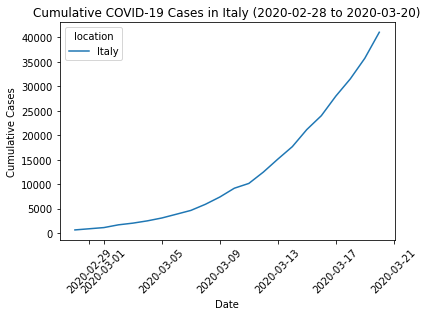

In [32]:
# Filter the DataFrame for the specified dates
italy_cumsum_case_in_time_df = italy_covid_df_copy[(italy_covid_df_copy['date'] >= "2020-02-28") & (italy_covid_df_copy['date'] <= "2020-03-20")]

# Plot the cumulative cases over time, with color differentiation based on 'location'
sns.lineplot(data=italy_cumsum_case_in_time_df, x='date', y='cumsum', hue='location')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in Italy (2020-02-28 to 2020-03-20)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Fitted curve parameters:
A: 898.2109026485607
B: 0.19398564644347333


<ipython-input-33-21540b8a3145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['date'] = pd.to_datetime(italy_cumsum_case_in_time_df['date'])
<ipython-input-33-21540b8a3145>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['ts'] = (italy_cumsum_case_in_time_df['date'] - italy_cumsum_case_in_time_df['date'].min()).dt.days


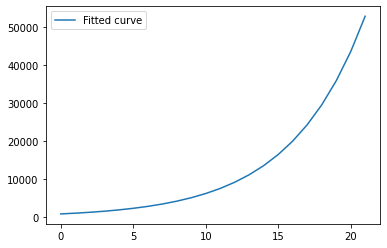

In [33]:
import numpy as np

# Convert 'date' column to datetime type
italy_cumsum_case_in_time_df['date'] = pd.to_datetime(italy_cumsum_case_in_time_df['date'])

# Get the minimum timestamp and subtract it from each date to get days since the start date
italy_cumsum_case_in_time_df['ts'] = (italy_cumsum_case_in_time_df['date'] - italy_cumsum_case_in_time_df['date'].min()).dt.days

# Define x and y variables
x = italy_cumsum_case_in_time_df['ts']
y = italy_cumsum_case_in_time_df['cumsum']

# Fit an exponential curve to the data
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]
y_fitted = a * np.exp(b * x)

# Print the parameters of the fitted curve
print("Fitted curve parameters:")
print("A:", a)
print("B:", b)

# Plot the fitted curve
plt.plot(x, y_fitted, label='Fitted curve')

# Display the plot
plt.legend()
plt.show()


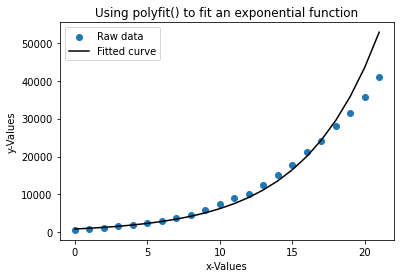

In [34]:
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [35]:
italy_data_2020_03_20 = italy_cumsum_case_in_time_df[italy_cumsum_case_in_time_df['date'] == '2020-03-20']
italy_data_2020_03_20

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum,ts
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,41035,21


In [36]:
x_test = italy_data_2020_03_20['ts'].item()
y_test = italy_data_2020_03_20['cumsum'].item()
y_pred = a * np.exp(b * x_test)
print(x_test, y_test, y_pred)
print(y_pred - y_test)

21 41035 52791.394540484864
11756.394540484864


Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants

In [37]:
cd_df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [38]:
# Group the DataFrame by 'location' and aggregate the columns
country_death_rate_df = cd_df.groupby('location').agg({
    'new_deaths': 'sum',
    'population': 'mean',
    'aged_65_older_percent': 'first'
})

# Calculate the death rate per million people
country_death_rate_df['death_rate'] = (country_death_rate_df['new_deaths'] / country_death_rate_df['population']) * 1000000

# Sort the DataFrame by death rate in descending order
country_death_rate_df_sorted = country_death_rate_df.sort_values(by='death_rate', ascending=False)

# Get the name of the third-highest death rate country
third_highest_country = country_death_rate_df_sorted.index[2]

# Print the name of the third-highest death rate country
print("The third-highest death rate country is:", third_highest_country)
country_death_rate_df_sorted


The third-highest death rate country is: Andorra


,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!

To calculate the F1 score for the given statement, we need the following information:

- True Positives (TP): Countries meeting both conditions (over 20% of the population over 65 and death rates over 50 per million inhabitants).
- False Positives (FP): Countries incorrectly identified as meeting both conditions.
- True Negatives (TN): Countries correctly identified as not meeting both conditions.
- False Negatives (FN): Countries incorrectly identified as not meeting both conditions.

Once we have these values, we can use the formula for F1 score:

\[ F1 = \frac{{2 \times \text{{Precision}} \times \text{{Recall}}}}{{\text{{Precision}} + \text{{Recall}}}} \]



Where:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)

Given this, we can compute the F1 score based on the data. If you provide the dataset containing the necessary information (population percentage of over 65 years old and death rates), I can help you calculate the F1 score.


In [39]:
country_death_rate_dropna_df = country_death_rate_df.dropna()
country_death_rate_dropna_df

country_aged_65_over_20_percent = country_death_rate_dropna_df[country_death_rate_dropna_df.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [40]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [41]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273

What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [42]:
gdp_beds_by_country_df = cd_df.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()
gdp_beds_by_country_df

<ipython-input-42-fd7a3951c896>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdp_beds_by_country_df = cd_df.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()


,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [43]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]
# country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846